In [20]:
# Arquivo integrante do projeto para identificação dos preditores mais correlacionados 
# aos óbitos por COVID no Brasil, apresentado à PUC-MINAS como TCC

# Análise e Exploração dos Dados

In [21]:
%run ./funcoes.ipynb

In [22]:
# Carrega a base tratada mas não balanceada, usada para a definição das variáveis de cada modelo
# Produzida pelo notebook COVID_Preprocessamento.ipynb
arquivo_base = "INFLUD21-29-03-2021.csv"  
ext_file = "_processed_pre_dummies.csv"
rad_filename = arquivo_base[:-4]  #exclui a extensão do arquivo
filename_pre_des = rad_filename + ext_file
covid_df_pre_dummies = load_df(filename_pre_des,";",None,None) #carrega os dados do arquivo csv parcialmente preprocessado
print('Núm. linhas e colunas:',covid_df_pre_dummies.shape) #exibe a quantidade de linhas e colunas do dataframe

Núm. linhas e colunas: (254948, 43)


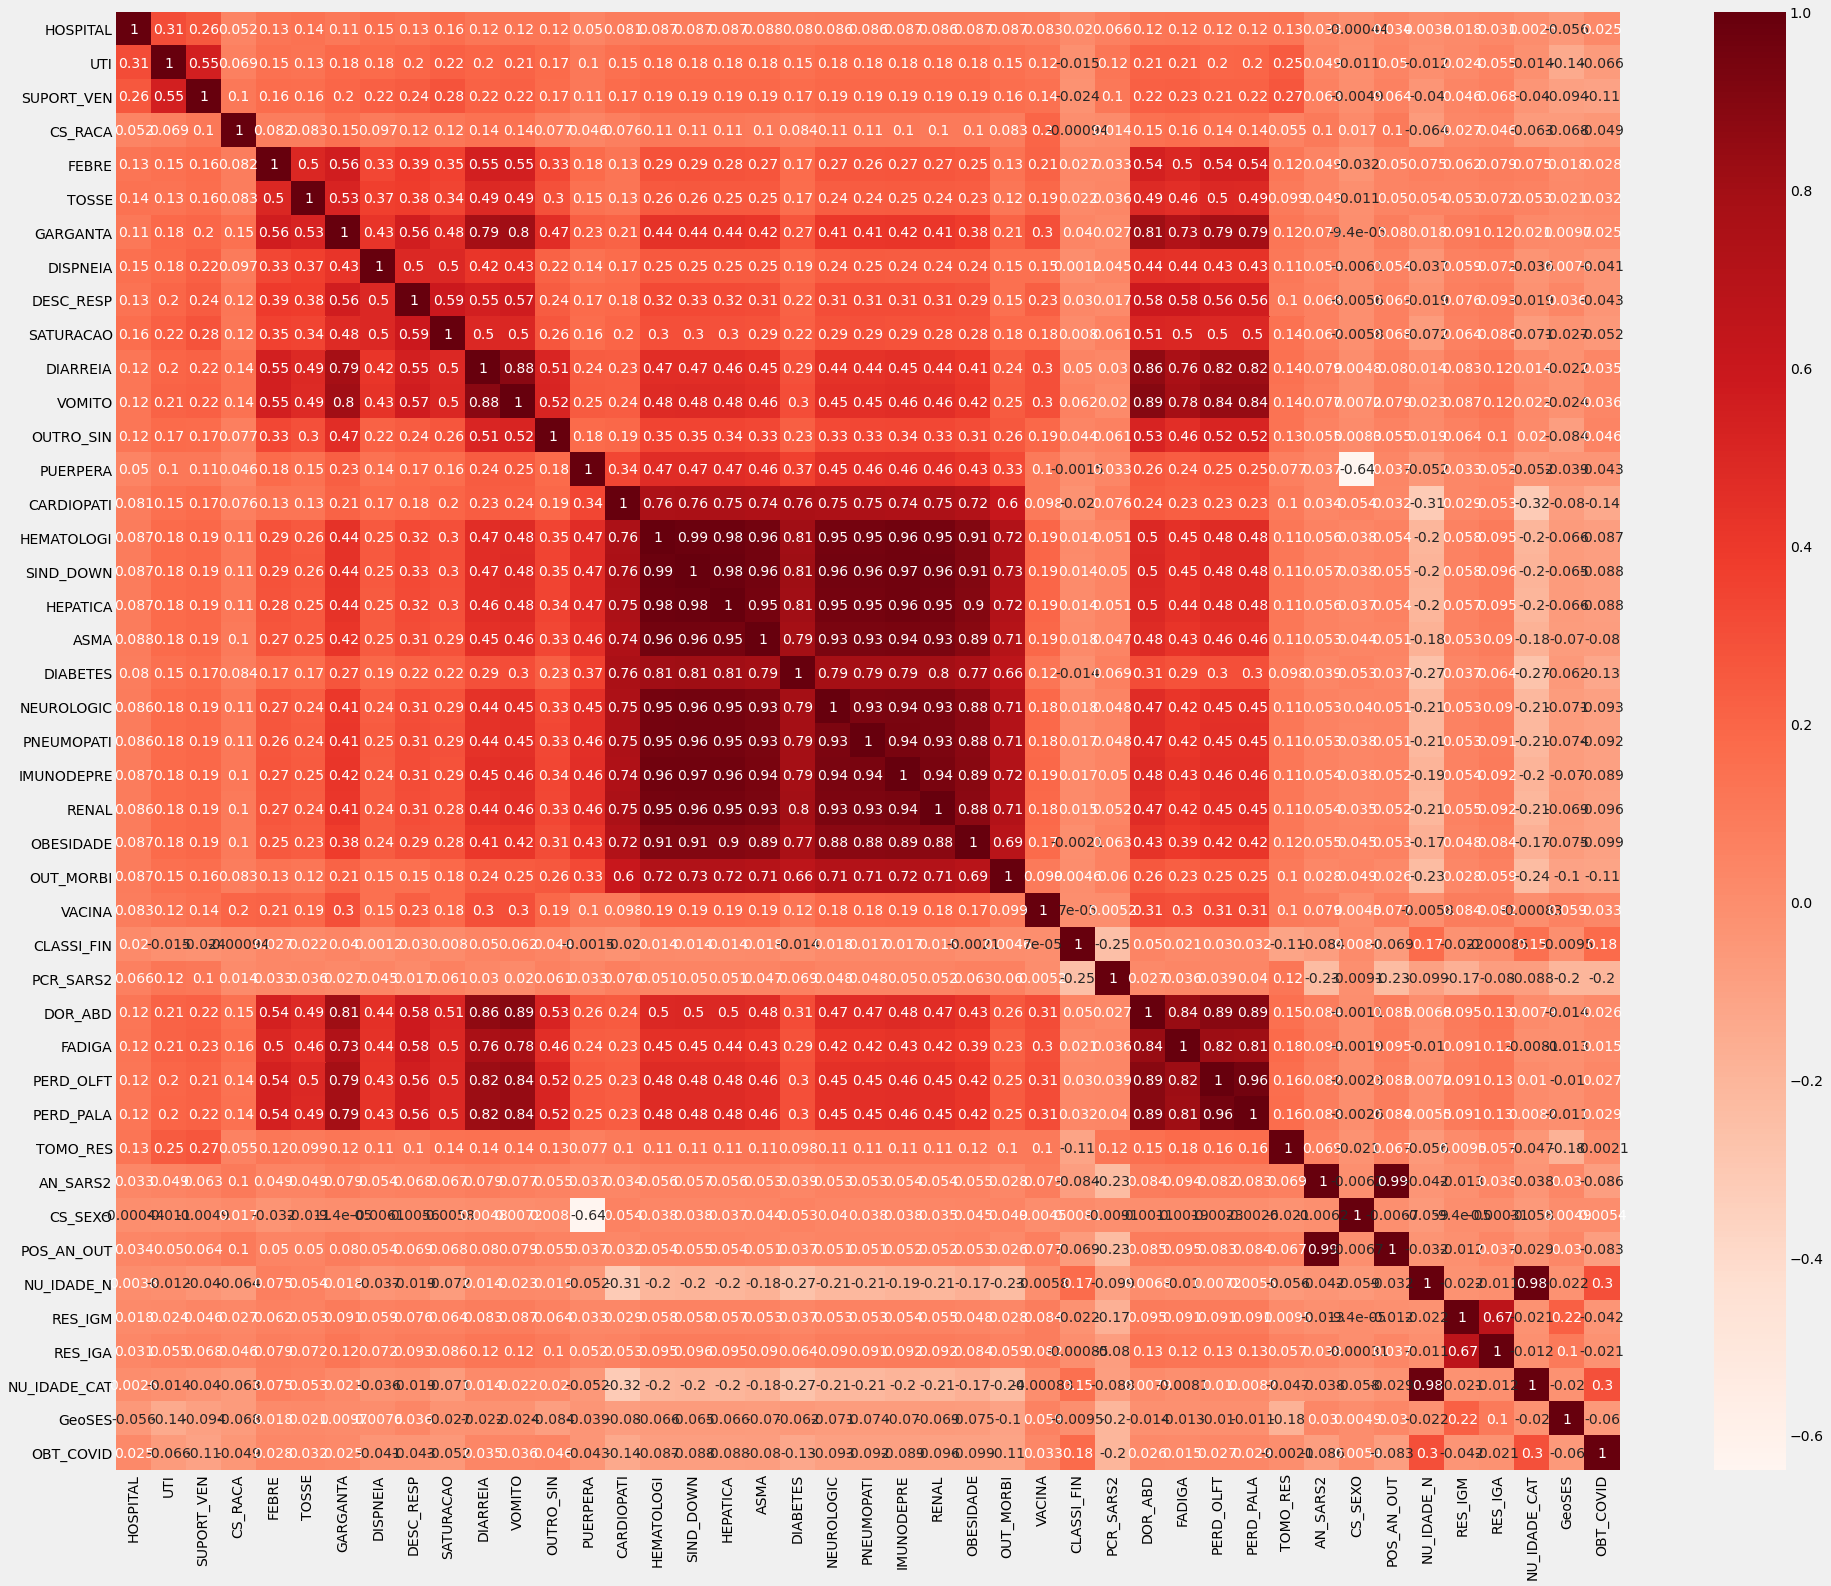

In [23]:
#verifica a correlação de Person
covid_df = covid_df_pre_dummies.astype(float)
corelacao_var = verifica_correlacao(covid_df,False,0.08)
corelacao_var.to_csv("correlacao.csv")

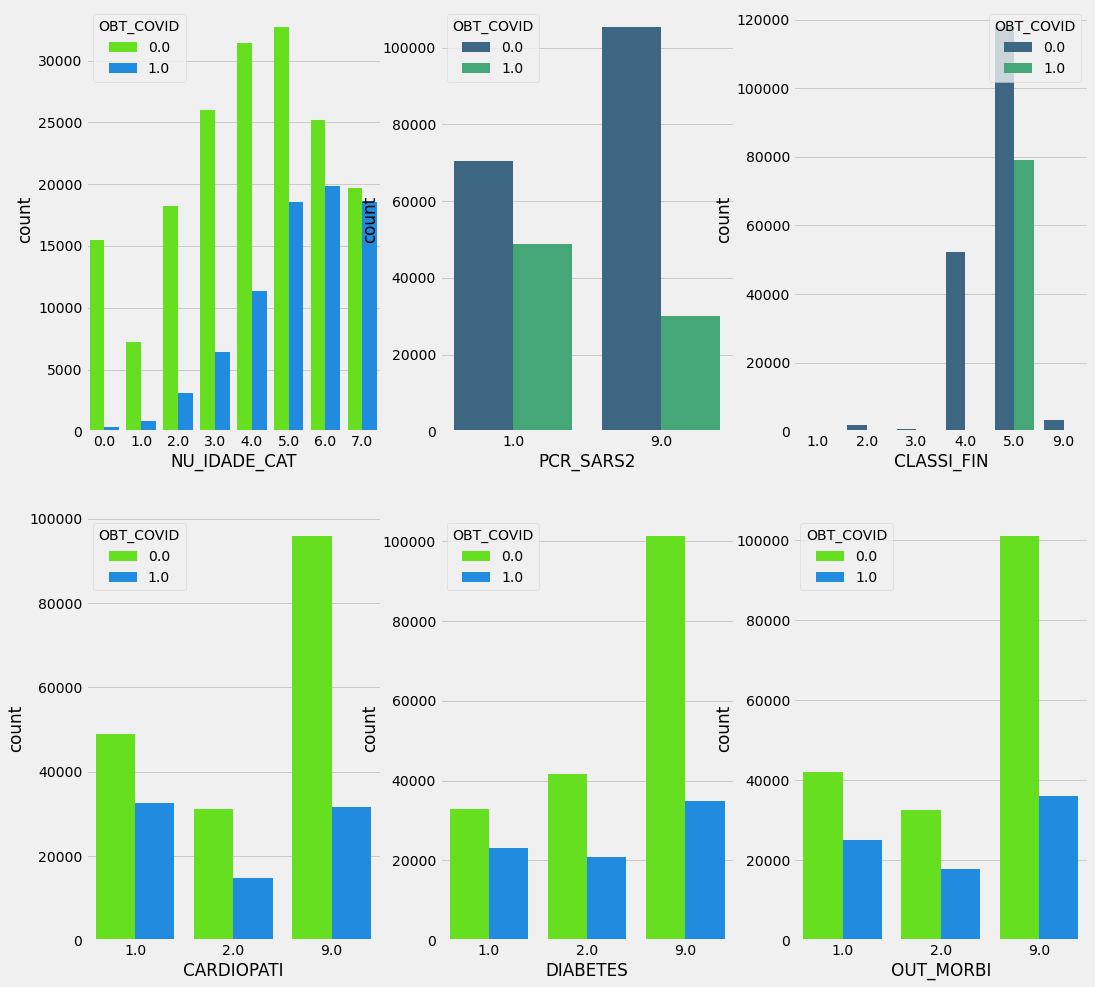

In [24]:
fig ,ax = plt.subplots(2,3,figsize=(16,16))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(data=covid_df,x='NU_IDADE_CAT',hue='OBT_COVID',palette='gist_rainbow',ax=ax1)
sns.countplot(data=covid_df,x='PCR_SARS2',hue='OBT_COVID',palette='viridis',ax=ax2)
sns.countplot(data=covid_df,x='CLASSI_FIN',hue='OBT_COVID',palette='viridis',ax=ax3)
sns.countplot(data=covid_df,x='CARDIOPATI',hue='OBT_COVID',palette='gist_rainbow',ax=ax4)
sns.countplot(data=covid_df,x='DIABETES',hue='OBT_COVID',palette='gist_rainbow',ax=ax5)
sns.countplot(data=covid_df,x='OUT_MORBI',hue='OBT_COVID',palette='gist_rainbow',ax=ax6)

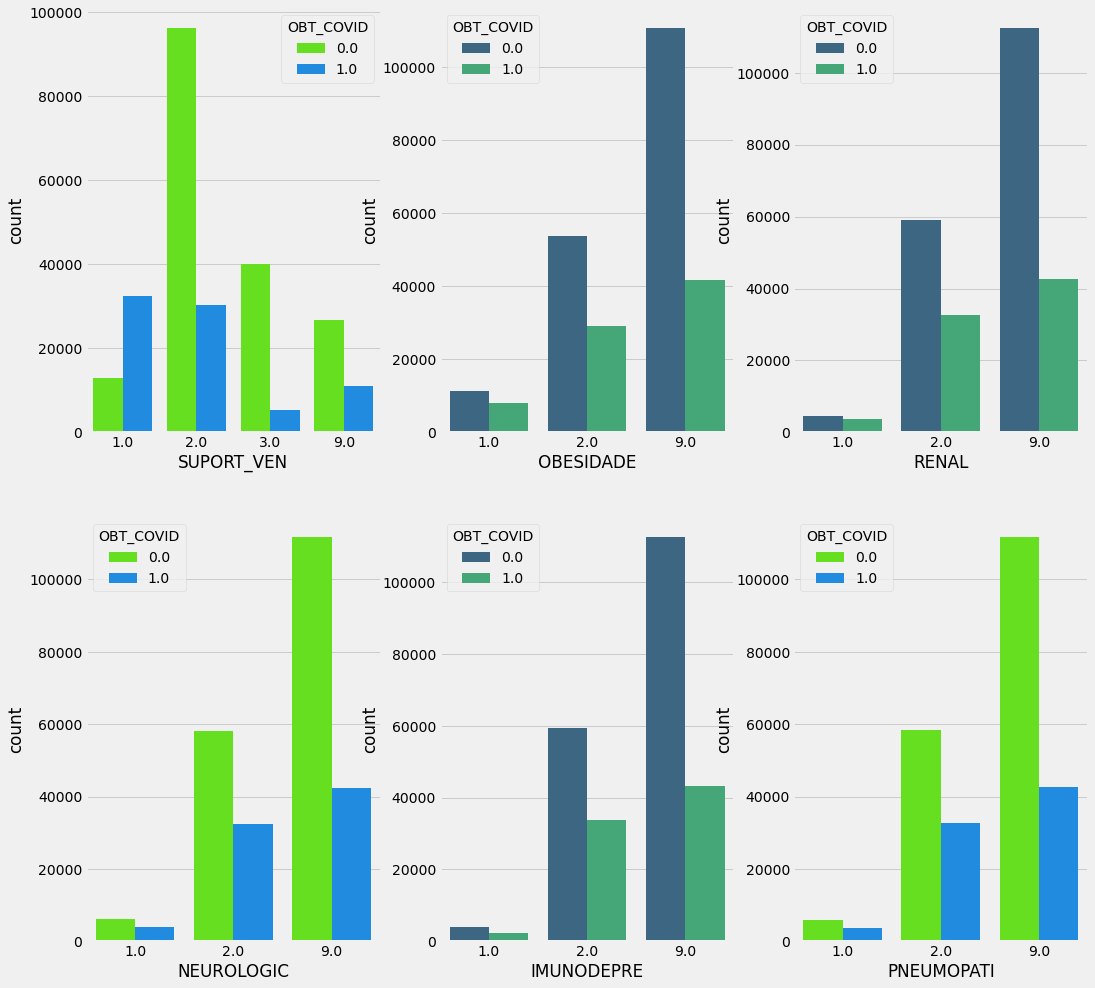

In [25]:
fig ,ax = plt.subplots(2,3,figsize=(16,16))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(data=covid_df,x='SUPORT_VEN',hue='OBT_COVID',palette='gist_rainbow',ax=ax1)
sns.countplot(data=covid_df,x='OBESIDADE',hue='OBT_COVID',palette='viridis',ax=ax2)
sns.countplot(data=covid_df,x='RENAL',hue='OBT_COVID',palette='viridis',ax=ax3)
sns.countplot(data=covid_df,x='NEUROLOGIC',hue='OBT_COVID',palette='gist_rainbow',ax=ax4)
sns.countplot(data=covid_df,x='IMUNODEPRE',hue='OBT_COVID',palette='viridis',ax=ax5)
sns.countplot(data=covid_df,x='PNEUMOPATI',hue='OBT_COVID',palette='gist_rainbow',ax=ax6)

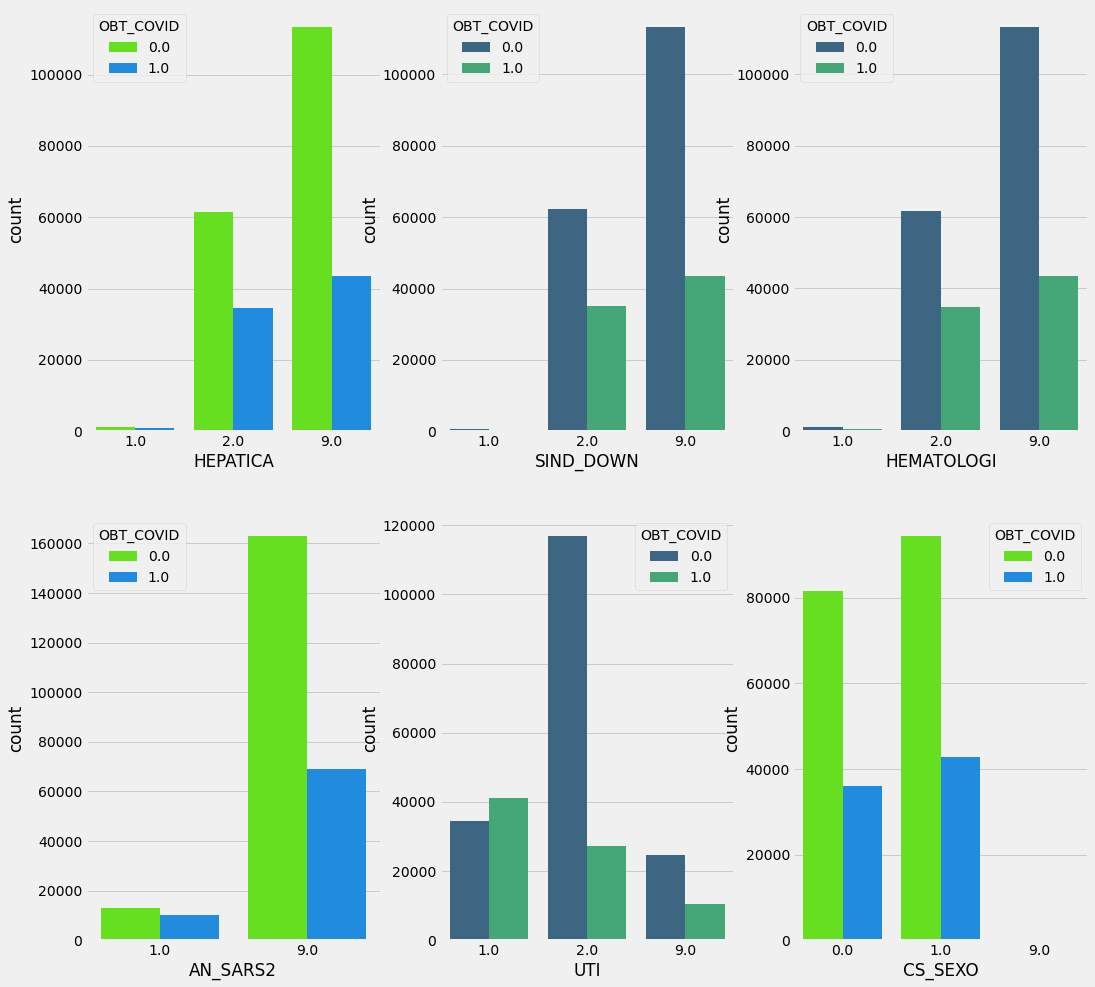

In [26]:
fig ,ax = plt.subplots(2,3,figsize=(16,16))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(data=covid_df,x='HEPATICA',hue='OBT_COVID',palette='gist_rainbow',ax=ax1)
sns.countplot(data=covid_df,x='SIND_DOWN',hue='OBT_COVID',palette='viridis',ax=ax2)
sns.countplot(data=covid_df,x='HEMATOLOGI',hue='OBT_COVID',palette='viridis',ax=ax3)
sns.countplot(data=covid_df,x='AN_SARS2',hue='OBT_COVID',palette='gist_rainbow',ax=ax4)
sns.countplot(data=covid_df,x='UTI',hue='OBT_COVID',palette='viridis',ax=ax5)
sns.countplot(data=covid_df,x='CS_SEXO',hue='OBT_COVID',palette='gist_rainbow',ax=ax6)

### Análise das variáveis contínuas

In [27]:
covid_df['GeoSES'].describe()

count    254948.000000
mean          0.026197
std           0.274244
min          -0.959313
25%          -0.160923
50%           0.054019
75%           0.245995
max           1.000000
Name: GeoSES, dtype: float64

In [32]:
covid_df['NU_IDADE_N'].describe()

count    254948.000000
mean         57.999867
std          21.231822
min           0.000000
25%          45.000000
50%          61.000000
75%          73.000000
max         130.000000
Name: NU_IDADE_N, dtype: float64

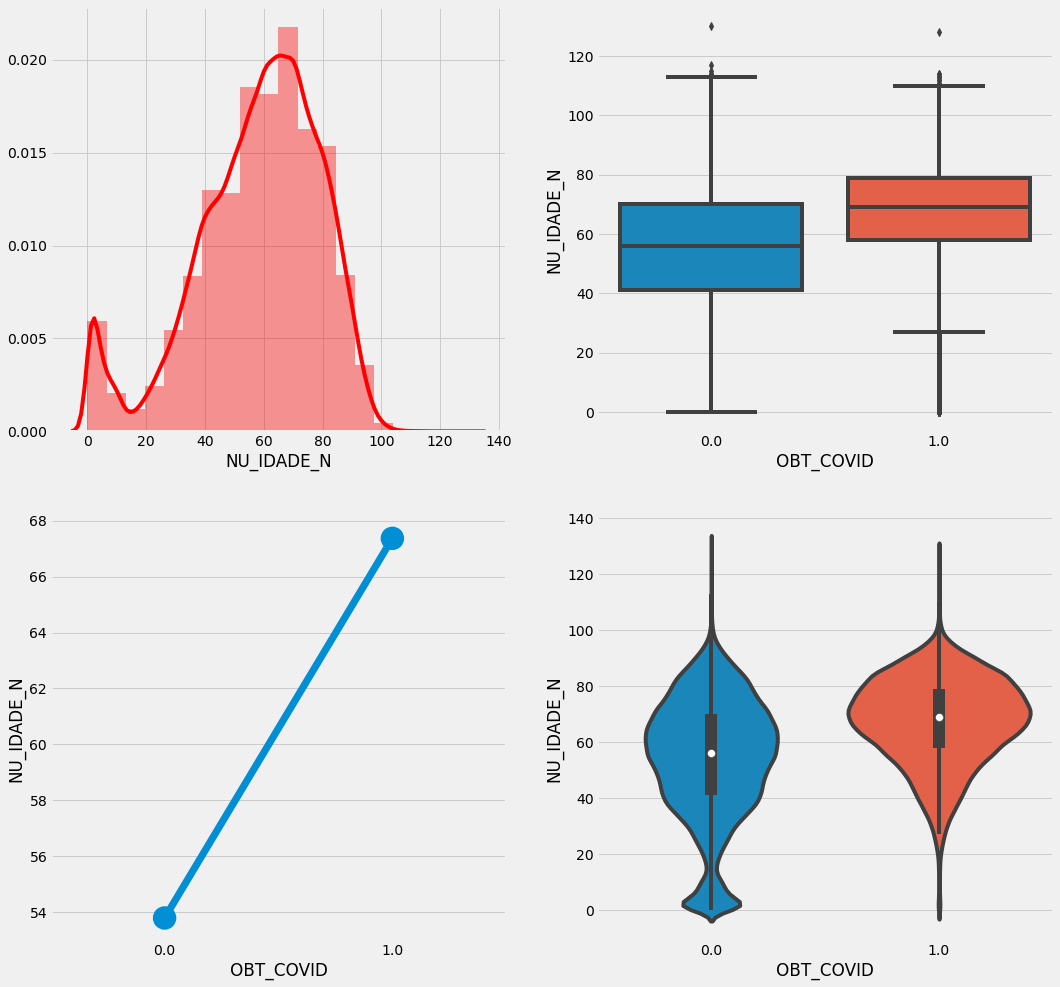

In [33]:
fig,ax = plt.subplots(2,2,figsize=(16,16))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(covid_df['NU_IDADE_N'],bins=20,color='r',ax=ax1)
sns.boxplot(y='NU_IDADE_N',x='OBT_COVID',data=covid_df,ax=ax2)
sns.pointplot(y='NU_IDADE_N',x='OBT_COVID',data=covid_df,ax=ax3)
sns.violinplot(y='NU_IDADE_N',x='OBT_COVID',data=covid_df,ax=ax4)

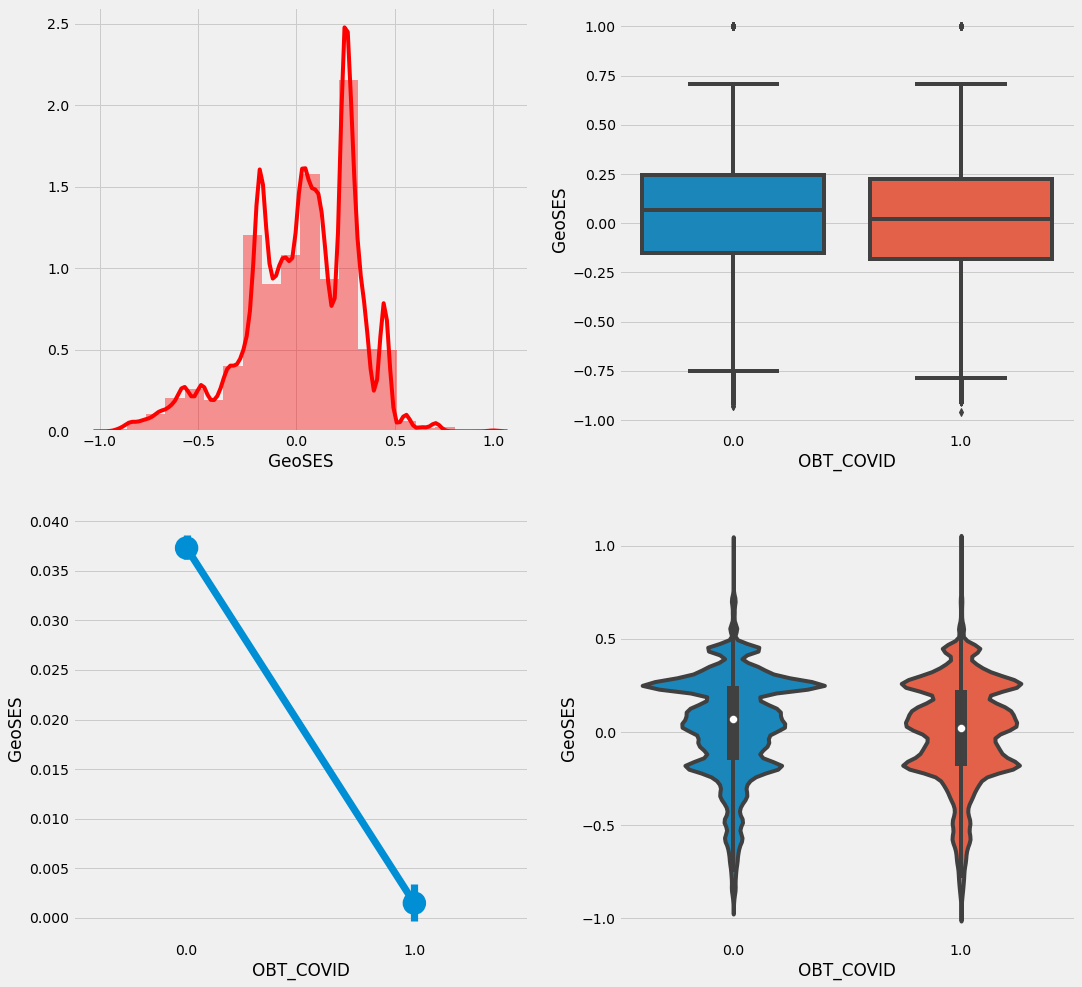

In [28]:
fig,ax = plt.subplots(2,2,figsize=(16,16))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(covid_df['GeoSES'],bins=20,color='r',ax=ax1)
sns.boxplot(y='GeoSES',x='OBT_COVID',data=covid_df,ax=ax2)
sns.pointplot(y='GeoSES',x='OBT_COVID',data=covid_df,ax=ax3)
sns.violinplot(y='GeoSES',x='OBT_COVID',data=covid_df,ax=ax4)

In [35]:
# Exclui a variával criada para fins exploratórios
covid_df_pre_dummies = covid_df_pre_dummies.drop(['NU_IDADE_CAT'], axis = 1)

C:\Users\02373373718\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[11:02:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


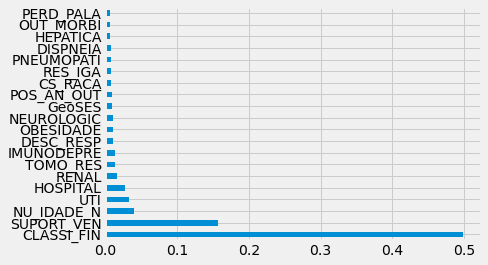

In [36]:

# Seleção das melhores features para o modelo "LogisticRegression"
modelo_XGB = XGBClassifier()
top_features_importance = sel_features_importance(covid_df_pre_dummies,modelo_XGB,20)

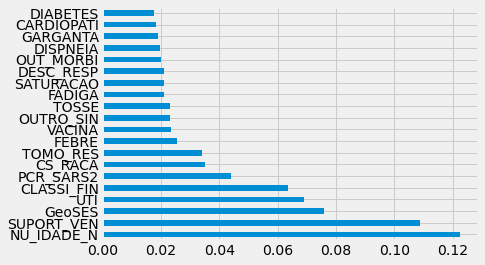

In [37]:
# Seleção das melhores features para o modelo "ExtraTreesClassifier"
modelo = ExtraTreesClassifier()
top_features_importance = sel_features_importance(covid_df_pre_dummies,modelo,20)

In [31]:
# Seleção das variáveis com maior correlação com a variável dependente.
top_univariate_features = sel_univariate_features(covid_df_pre_dummies,20)

        variavel        Score
28     PCR_SARS2  4892.842753
40  NU_IDADE_CAT  2811.255204
14    CARDIOPATI  2125.238103
19      DIABETES  1605.466116
37    NU_IDADE_N  1333.303647
25     OUT_MORBI  1213.085992
2     SUPORT_VEN  1173.182784
24     OBESIDADE   763.455107
23         RENAL   670.499593
20    NEUROLOGIC   646.016794
21    PNEUMOPATI   621.185951
22    IMUNODEPRE   566.203995
1            UTI   550.867657
17      HEPATICA   546.299003
16     SIND_DOWN   537.770099
15    HEMATOLOGI   537.719478
9      SATURACAO   479.201720
18          ASMA   466.505546
8      DESC_RESP   315.869550
7       DISPNEIA   311.911419
